In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
X, y = make_moons(100, noise=0.25,random_state=2)

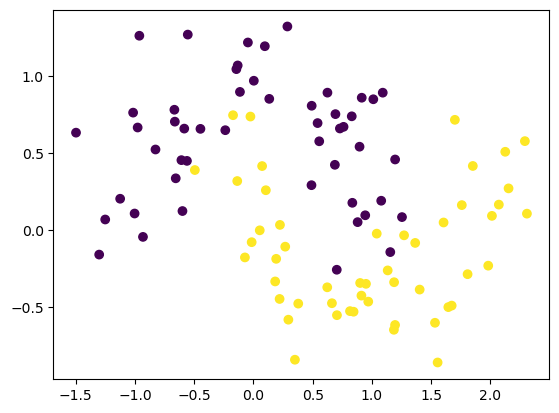

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [7]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

model1.summary()

C:\Users\Subhakanta\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
adam = Adam(learning_rate=0.01)
model1.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history1 = model1.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


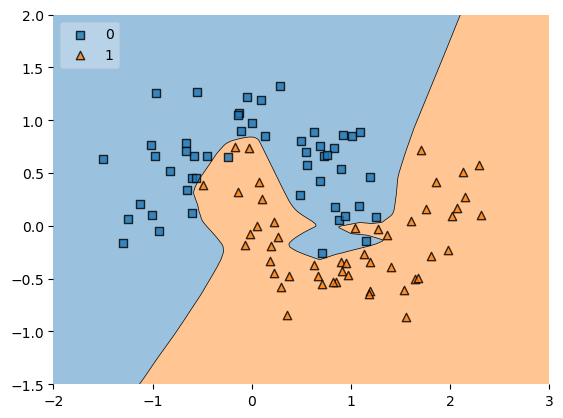

In [11]:
plot_decision_regions(X, y.astype('int'), clf=model1, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

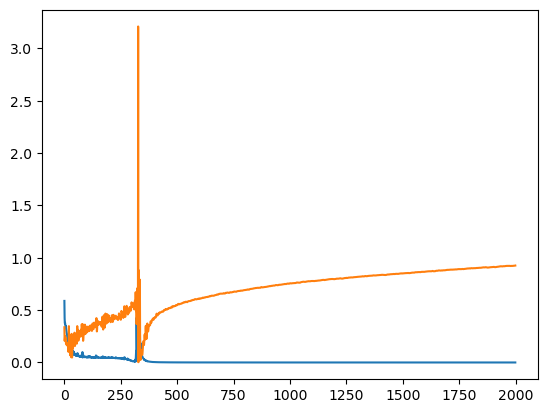

In [13]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

In [15]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
adam = Adam(learning_rate=0.01)
model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history2 = model2.fit(X, y, epochs=2000, validation_split = 0.2,verbose=0)

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step


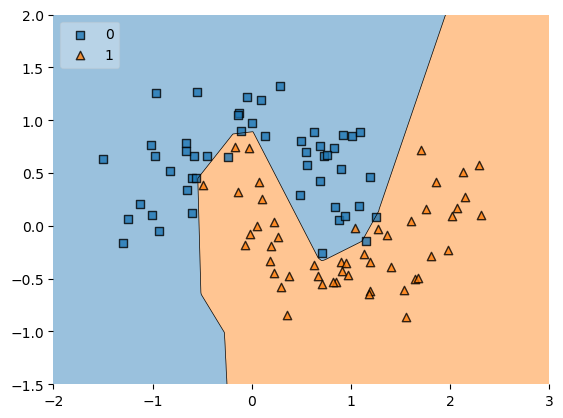

In [18]:
plot_decision_regions(X, y.astype('int'), clf=model2, legend=2)
plt.xlim(-2,3)
plt.ylim(-1.5,2)
plt.show()

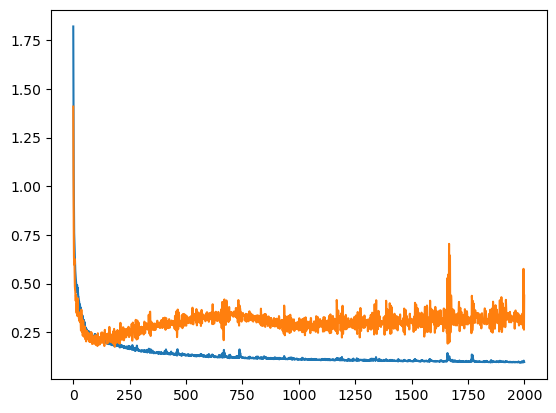

In [19]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])

In [23]:
model1_weight_layer1 = model1.get_weights()[0].reshape(256)
model2_weight_layer1 = model2.get_weights()[0].reshape(256)

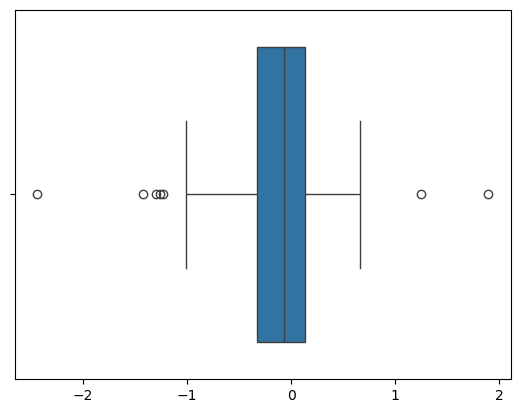

In [39]:
sns.boxplot(x=model1_weight_layer1)
plt.show()

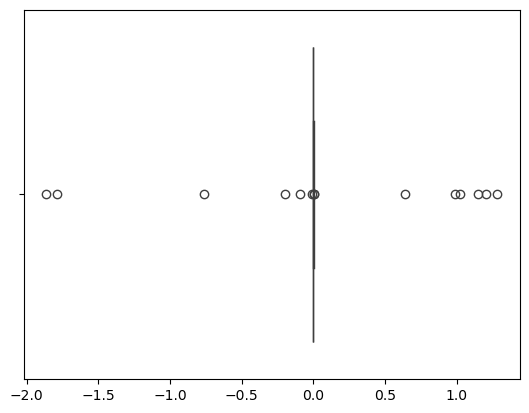

In [41]:
sns.boxplot(x=model2_weight_layer1)
plt.show()

In [29]:
model1_weight_layer1.min()

-2.4408815

In [31]:
model2_weight_layer1.min()

-1.8639041

<Axes: ylabel='Density'>

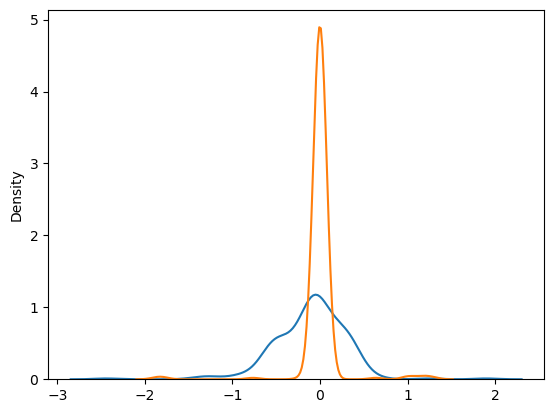

In [35]:
sns.kdeplot(model1_weight_layer1)
sns.kdeplot(model2_weight_layer1)

In [37]:
model1.get_weights()[0].reshape(256)

array([-3.30602854e-01, -2.71128893e-01,  3.51356536e-01,  1.89751713e-03,
       -2.95072287e-01, -1.13325389e-02,  4.05402035e-01, -1.99160874e-02,
        5.22111654e-02,  2.59024382e-01, -1.13078453e-01, -4.53765005e-01,
       -3.13021928e-01,  2.45939717e-02,  3.05135280e-01,  2.77326345e-01,
       -6.41279697e-01,  9.56531316e-02, -5.15266061e-01, -2.72887170e-01,
       -5.55914462e-01,  1.75995618e-01, -5.07302463e-01,  9.93743464e-02,
        7.00174943e-02, -2.83705555e-02,  4.03062224e-01, -4.62819785e-01,
        2.74307877e-01,  1.34618595e-01,  5.49217582e-01,  4.82590318e-01,
       -2.38988828e-02, -6.17843866e-01,  3.45843434e-01, -5.41350126e-01,
        3.48505586e-01,  2.72824496e-01, -3.48644942e-01, -3.99699539e-01,
        1.24368846e-01, -4.66257244e-01, -9.06080976e-02,  1.01016946e-01,
       -8.07655215e-01, -3.44288856e-01, -8.20999444e-02, -1.34931579e-01,
       -5.07577300e-01, -3.76790136e-01, -2.68788159e-01,  6.17089197e-02,
        9.87954959e-02, -